Grupo

227124 Jorge Henrique Monteiro dos Santos

262251 Vitor Mello de Araujo Lima

# MO431A - Tarefa 2

Esse trabalho aborda a utilização do algoritmo de descida do gradiente. A função de Rosenbrock será utilizada para ilustrar esse algoritmo de otimização:

$$f(x_1,x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $$

Essa função possui minimo global no ponto [1,1]

## Descida do Gradiente

O método da descida do gradiente utiliza o gradiente da função em conjunto com o _learning rate_ para definir o próximo ponto a ser testado. Como ilustrado pela seguinte equação:

$$ x_{i+1} = x_i - \alpha\nabla f(x_i) $$




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Vizualizando o problema

In [2]:
def rosenbrock_func(x1,x2):
    return (1 - x1)**2 + 100*(x2 - x1**2)**2

min_global = np.array([[1.0],
                       [1.0]])

Text(0.5, 0, 'z')

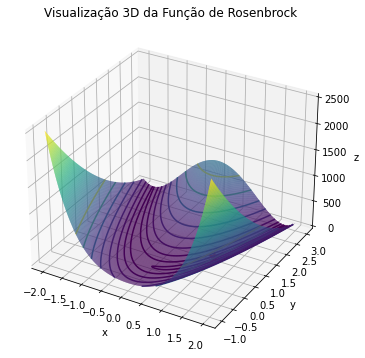

In [3]:
fig = plt.figure(figsize=(13,6))
ax = plt.axes(projection="3d") 
x_vals = np.linspace(-2, 2, 250)
y_vals = np.linspace(-1, 3, 250)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock_func(X,Y)


plt.contour(X,Y,Z,np.arange(10)**3)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.plot(*min_global,rosenbrock_func(*min_global), 'r*', markersize=10)

plt.title('Visualização 3D da Função de Rosenbrock')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0, 0.5, 'y')

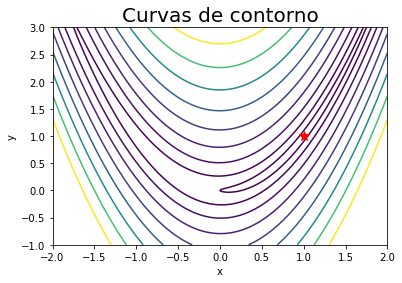

In [4]:
cp = plt.contour(X,Y,Z,np.arange(10)**3)
plt.plot(*min_global, 'r*', markersize=10)
plt.title('Curvas de contorno',size=20)
plt.xlabel('x')
plt.ylabel('y') 

## 1 Implementação de descida do gradiente com gradiente explicito

Como comentado anteriormente, o método da descida do gradiente utiliza a direção contraria àquela dada pelo gradiente da função para calcular o próximo ponto analisado. Existem três métodos para calcular o gradiente de uma função: diferenciação simbólica, diferenciação automática e computação numérica. 

Nesse trabalho utilizaremos no item 1 a diferenciação simbólica e no item 2 a diferenciação automática, por meio do framework tensorflow.

- Grandiente da função de Rosenbrock:

  
  $$\frac{\partial f(x_1,x_2)}{\partial x_1} = 2(200 x_1^3 - 200 x_1 x_2 + x_1 - 1)$$
  
  $$\frac{\partial f(x_1,x_2)}{\partial x_2} = 200 (x_2 - x_1^2)$$  
  

In [5]:
tol = 1.0e-5    
maxPassos = 50000
init = np.zeros((2,1)) 

In [6]:
def resenbrock_grad(x1,x2):
    dx1 = 2*(200*x1**3 - 200*x1*x2 + x1 - 1)
    dx2 = 200*(x2 - x1**2)        
    return dx1,dx2

In [7]:
def descida_grad(func,func_grad,tol,lr,init,maxpassos,lr_callback = lambda x: x, use_tensor_flow = False):
    
    x0=tf.Variable(init[0])
    x1=tf.Variable(init[1])

    with tf.GradientTape() as tape:
        f_old = func(x0,x1)
    [tf_dx0, tf_dx1] = tape.gradient(f_old,[x0, x1])
    
    if use_tensor_flow :
        dx0=tf_dx0
        dx1=tf_dx1
    else :
        dx0,dx1 = func_grad(init[0],init[1])
    
    x0_next =  init[0] - lr*dx0 
    x1_next =  init[1] - lr*dx1     
    f_new = func(x0_next,x1_next)
    
    l0_gd = [init[0],x0_next]
    l1_gd = [init[1],x1_next]
    f_values = [f_old,f_new]
    
    step = 1
    while (step < maxpassos) and (abs(f_new - f_old) > tol):
        dx0,dx1 = func_grad(x0_next,x1_next)
        lr = lr_callback(lr)
        x0_next =  x0_next - lr*dx0 
        x1_next =  x1_next - lr*dx1 
        
        f_old = f_new
        f_new = func(x0_next,x1_next)

        step = step + 1
        
        l0_gd.append(x0_next)
        l1_gd.append(x1_next)
        f_values.append(f_new) 

    return l0_gd,l1_gd,f_values

    

In [8]:
def plot_grad_resultados(gd_x1, gd_x2, gd_func):
    print("Numero de iterações: ", len(gd_x1) - 1 )
    print("X final: ",  gd_x1[-1], gd_x2[-1] )
    
    
    fig = plt.figure(figsize=(10,20))
    #fig.tight_layout()
    
    # Ploting  F(x) vs Passos
    
    ax = fig.add_subplot(3, 1, 1)
    
    steps = np.linspace(0,len(gd_x1) - 1,len(gd_x1))
       
    ax.plot(steps,gd_func)
    ax.set_title('F(x1,x2) vs Passos',size=20)
    ax.set_xlabel('Passos')
    ax.set_ylabel('f(x1,x2)') 

    x_vals = np.linspace(-2, 2, 250)
    y_vals = np.linspace(-1, 3, 250)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_func(X,Y)
    
    # Ploting superficie 3D
    
    ax = fig.add_subplot(3, 1, 2, projection='3d')  
    x_vals = np.linspace(-2, 2, 250)
    y_vals = np.linspace(-1, 3, 250)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_func(X,Y)
    
    gd_x1_np = np.array(gd_x1).flatten()
    gd_x2_np = np.array(gd_x2).flatten()
    
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')  
    res = rosenbrock_func(gd_x1_np,gd_x2_np).flatten()    
    
    ax.plot3D(gd_x1_np,gd_x2_np,res, marker = '*', alpha = .4,color='r')    
    ax.set_title('Visualização 3D dos passos',size=20)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2') 
    ax.set_zlabel('f(x1,x2)') 
    ax.view_init(30, 225)


    # Ploting Curvas de contorno
    
    ax = fig.add_subplot(3, 1, 3) 
    cp = ax.contour(X,Y,Z,50)    
    ax.plot(*min_global, 'r*', markersize=10)

    ax.plot(gd_x1_np,gd_x2_np,color = 'b',linestyle='-',linewidth=1.3)


    ax.set_title('Descida do Gradiente')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2') 
    
    

## 1.1 Usando  $ l.r = 1.e-3 $

Numero de iterações:  3096
X final:  [0.89736593] [0.80482897]


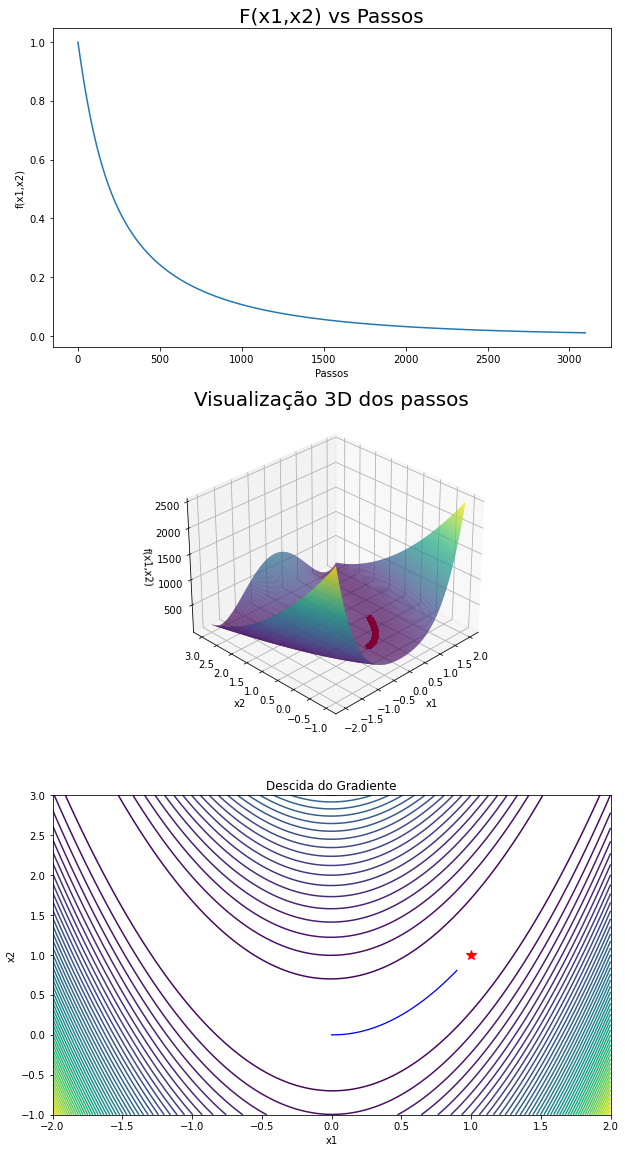

In [9]:
gd_x1_lr3,gd_x2_lr3, gd_func_lr3 = descida_grad(rosenbrock_func,resenbrock_grad,tol,1.e-3,init,maxPassos)

plot_grad_resultados(gd_x1_lr3,gd_x2_lr3, gd_func_lr3)



## 1.2 Usando  $ l.r = 1.e-4 $

Numero de iterações:  12384
X final:  [0.72225191] [0.52034643]


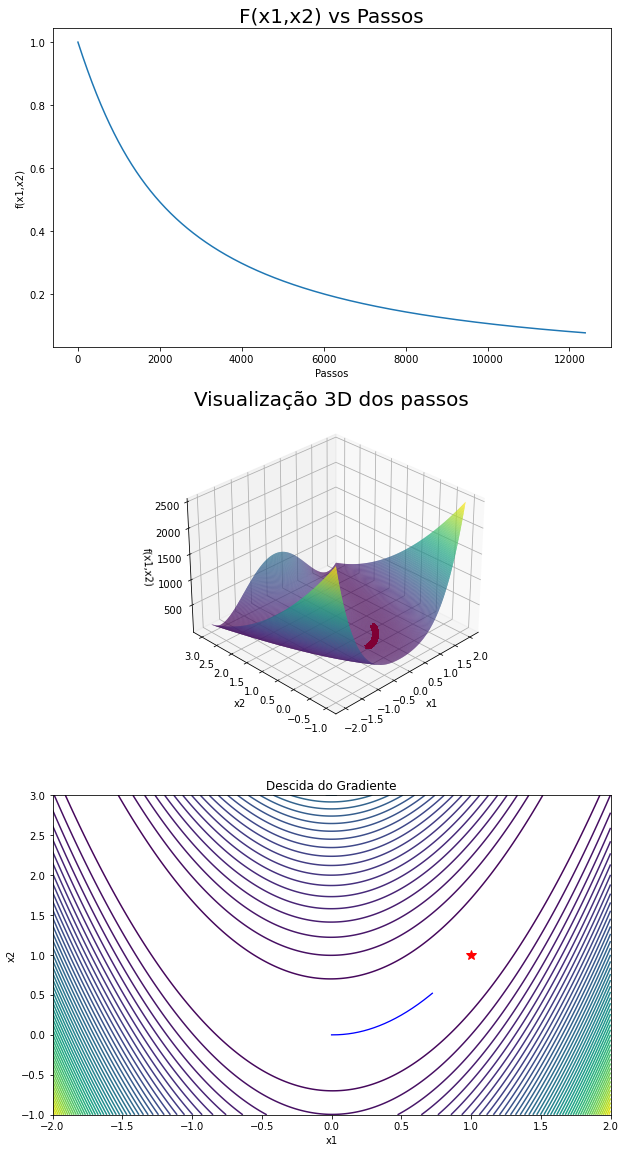

In [10]:
gd_x1_lr4,gd_x2_lr4, gd_func_lr4 = descida_grad(rosenbrock_func,resenbrock_grad,tol,1.e-4,init,maxPassos)

plot_grad_resultados(gd_x1_lr4,gd_x2_lr4, gd_func_lr4)

## Comparando as descidas com   $l.r = 1.e-3$ e  l.r = 1.e-4

A figura abaixo destaca o impacto da escolha no _learnig rate_ na performance do método de descida do gradiente. Um passo menor não permite que se avance muito em regiões suaves da função. Logo, o avanço ao percorrer a função foi menor que o mínimo definido pelo teste de convergência em um ponto mais distante do mínimo global para o $l.r = 1.e-4$.

Text(0.5, 1.0, 'Descida do Gradiente')

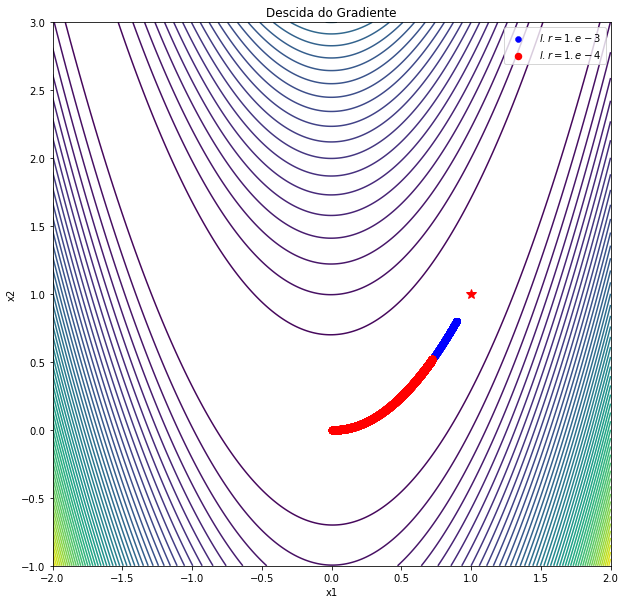

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

cp = ax.contour(X,Y,Z,50)
ax.plot(*min_global, 'r*', markersize=10)

ax.scatter(gd_x1_lr3,gd_x2_lr3,color = 'b',linewidth=0.5, label=" $l.r = 1.e-3$")
ax.scatter(gd_x1_lr4,gd_x2_lr4,color = 'r',linewidth=1.5, label=" $l.r = 1.e-4$")

ax.set_xlabel('x1')
ax.set_ylabel('x2') 

plt.legend()
ax.set_title('Descida do Gradiente')


## 1.3 Usando  $l.r$ grande (1.e-2)

Um _learning rate_ muito grande pode fazer com que a descida do gradiente oscile bastante ou até mesmo divirja, como o primeiro gráfico abaixo ilustra.  


<ipython-input-2-5e0056dd27a9>:2: RuntimeWarning: overflow encountered in square
  return (1 - x1)**2 + 100*(x2 - x1**2)**2
<ipython-input-6-b309bde4e6e1>:2: RuntimeWarning: overflow encountered in power
  dx1 = 2*(200*x1**3 - 200*x1*x2 + x1 - 1)
<ipython-input-6-b309bde4e6e1>:3: RuntimeWarning: overflow encountered in square
  dx2 = 200*(x2 - x1**2)
<ipython-input-2-5e0056dd27a9>:2: RuntimeWarning: invalid value encountered in subtract
  return (1 - x1)**2 + 100*(x2 - x1**2)**2


Numero de iterações:  41
X final:  [-inf] [inf]


<ipython-input-2-5e0056dd27a9>:2: RuntimeWarning: overflow encountered in square
  return (1 - x1)**2 + 100*(x2 - x1**2)**2
<ipython-input-2-5e0056dd27a9>:2: RuntimeWarning: invalid value encountered in subtract
  return (1 - x1)**2 + 100*(x2 - x1**2)**2
/home/jorgehs/anaconda3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


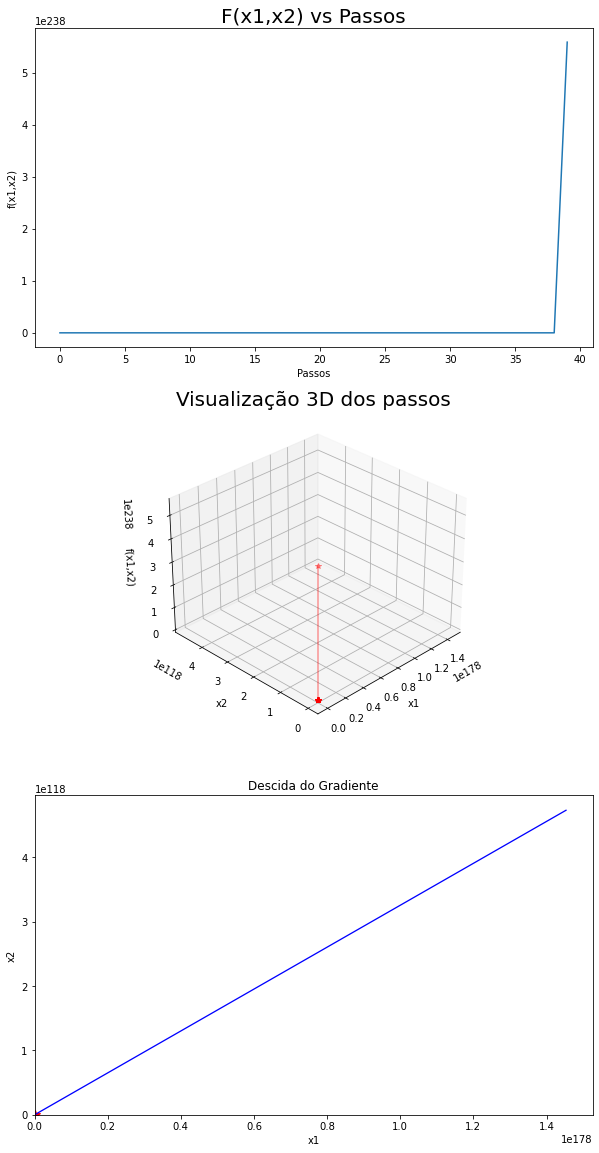

In [12]:
gd_x1_lr2,gd_x2_lr2, gd_func_lr2 = descida_grad(rosenbrock_func,resenbrock_grad,tol,1.e-2,init,maxPassos)
plot_grad_resultados(gd_x1_lr2,gd_x2_lr2, gd_func_lr2)

## 1.4 Politica de redução do $l.r$

Numero de iterações:  1468
X final:  [0.90385419] [0.81654491]


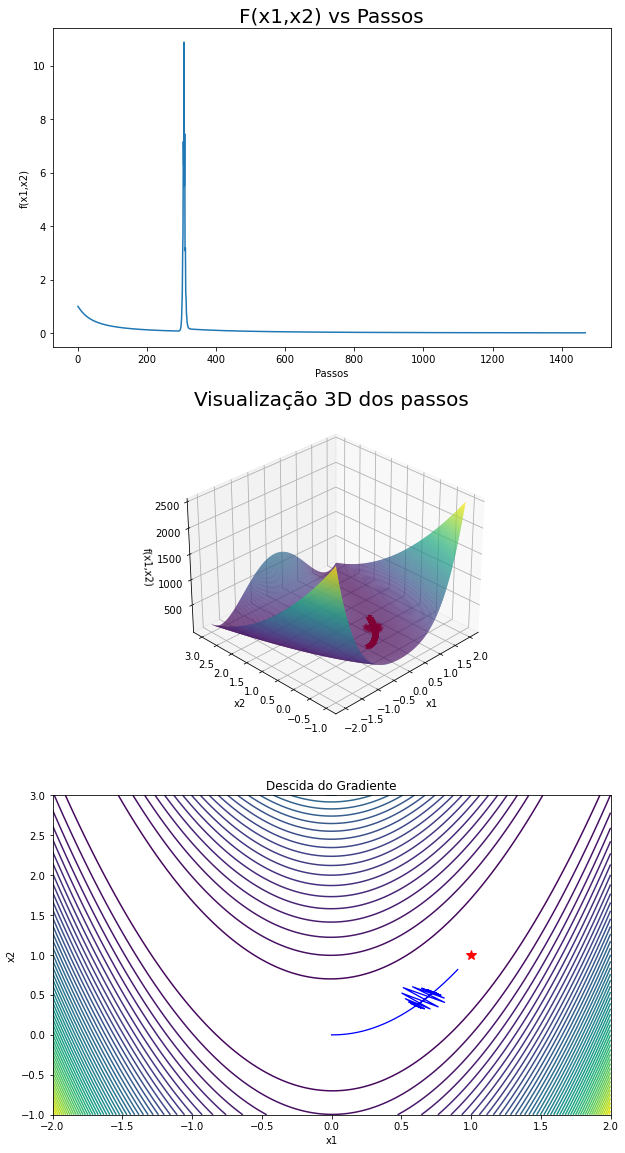

In [13]:
lr_red = lambda lr: lr*0.999 

gd_x1_red,gd_x2_red, gd_func_red = descida_grad(rosenbrock_func,resenbrock_grad,tol,5.e-3,init,maxPassos,lr_red)
plot_grad_resultados(gd_x1_red,gd_x2_red, gd_func_red)


## 2 Usando _tensorflow_ para calcular o gradiente

A função impementada possui um argumento _use\_tensor\_flow_ que é usado para decidir se o cálculo do gradiente utilizará a função implementada pelo grupo ou a disponível na biblioteca _tensorflow_, sendo assim, basta chamar novamente nossa função de descida de gradiente habilitando esse argumento e utilizando o melhor valor de _learning rate_, no caso, $1 \times 10^-3$


Numero de iterações:  3096
X final:  tf.Tensor([0.89736593], shape=(1,), dtype=float64) tf.Tensor([0.80482897], shape=(1,), dtype=float64)


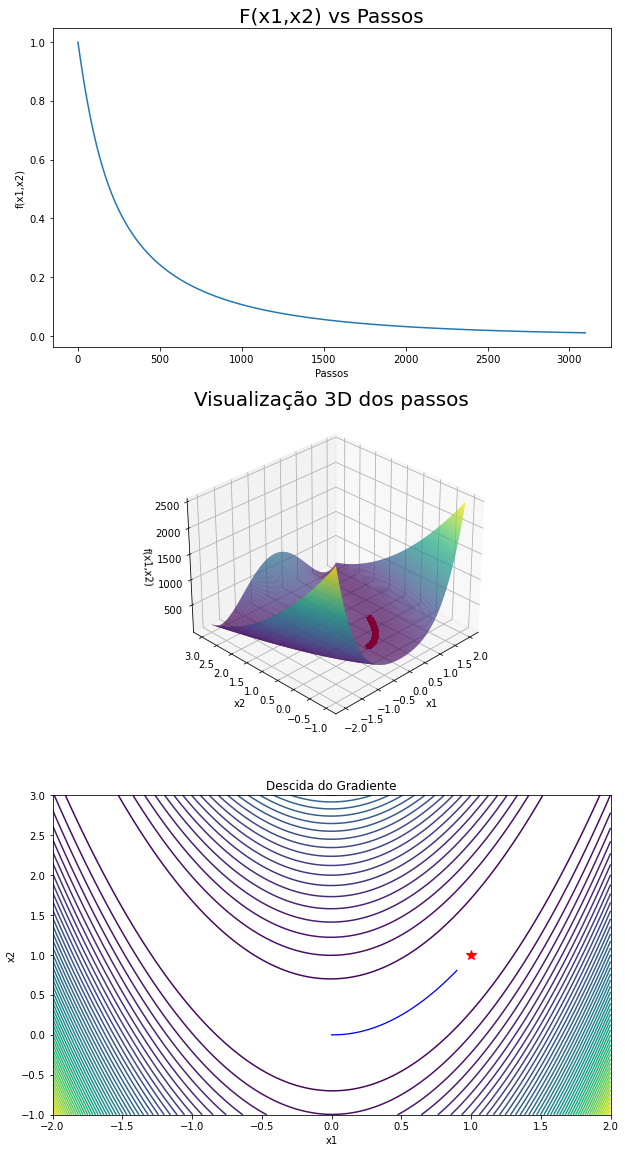

In [14]:
gd_x1_tf,gd_x2_tf, gd_func_tf = descida_grad(rosenbrock_func,resenbrock_grad,tol,1.e-3,init,maxPassos, use_tensor_flow = True)
plot_grad_resultados(gd_x1_tf,gd_x2_tf, gd_func_tf)